In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
import tensorflow as tf
from tensorflow.keras.models import load_model
import warnings 
warnings.filterwarnings('ignore')

In [2]:
model = load_model('model.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 29)                  │           1,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 472,223 (1.80 MB)

 Trainable params: 472,221 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

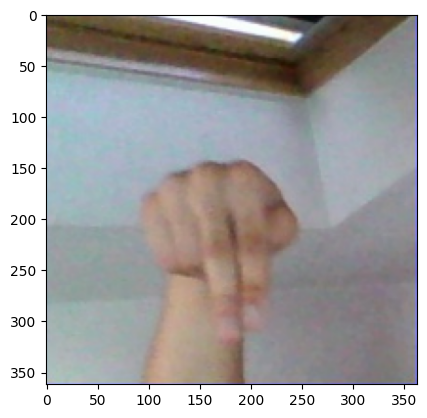

In [5]:
plt.imshow(imd.imread('image.png'))

In [6]:
img_path = 'image.png'
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array = img_array / 255.0  

In [7]:
predict = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


In [8]:
predicted_class = np.argmax(predict, axis=-1)

In [9]:
int(predicted_class)

13

In [10]:
import pickle
with open('class.pkl','rb')as f:
    classes = pickle.load(f)

In [11]:
classes[int(predicted_class)]

'N'

### Using YOLO Open CV

In [12]:
import cv2
import supervision as sv

In [19]:
cap = cv2.VideoCapture(0)
while True:
    res,frame = cap.read()
    cv2.imshow(frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [20]:
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[6.3718005e-07, 2.0161490e-16, 2.2060740e-04, 5.5292351e-11,
        5.9415649e-17, 1.5076050e-09, 2.8640200e-22, 4.6952184e-17,
        7.8238604e-21, 3.2633370e-21, 3.3763911e-22, 1.3948543e-06,
        4.0192216e-17, 1.6350007e-10, 2.3718389e-05, 5.3058058e-10,
        2.7722347e-04, 2.9615668e-16, 9.0089736e-07, 4.3686264e-04,
        1.5630414e-14, 8.6875326e-11, 2.3083850e-12, 1.3744953e-09,
        1.3382052e-07, 9.9898070e-01, 3.6031895e-07, 5.7392292e-05,
        7.7128443e-12]], dtype=float32)

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    res,frame = cap.read()
    image = cv2.resize(frame,(128,128))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    predict = model.predict(image)
    predicted_class = np.argmax(predict, axis=-1)
    predicted_class_label = classes[int(predicted_class)]
    cv2.putText(frame, predicted_class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import time
import mediapipe as mp
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hand_detection = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

box_color = (255, 0, 0)  
cap = cv2.VideoCapture(0)


def image_preprocess(img_path):
        image = cv2.resize(frame,(128,128))
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype('float32') / 255.0
        image = np.expand_dims(image, axis=0)
        predict = model.predict(image)
        predicted_class = np.argmax(predict, axis=-1)
        predicted_class_label = classes[int(predicted_class)]
        return predicted_class_label


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hand_detection.process(frame_rgb)


    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            x_min, y_min = 1, 1
            x_max, y_max = 0, 0
            for lm in hand_landmarks.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                x_min, y_min = min(x, x_min), min(y, y_min)
                x_max, y_max = max(x, x_max), max(y, y_max)

            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), box_color, 2)

            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2)
            )
            cv2.putText(frame, image_preprocess(frame), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            

    cv2.imshow("Hand Detection with MediaPipe", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [31]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hand_detection = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

box_color = (255, 0, 0)
cap = cv2.VideoCapture(0)

# Image preprocessing function
def image_preprocess(hand_img):
    hand_img = cv2.resize(hand_img, (128, 128))
    hand_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)
    hand_img = hand_img.astype('float32') / 255.0
    hand_img = np.expand_dims(hand_img, axis=0)
    predict = model.predict(hand_img)
    predicted_class = np.argmax(predict, axis=-1)
    predicted_class_label = classes[int(predicted_class)]
    return predicted_class_label

padding = 20 
# Start the webcam feed
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hand_detection.process(frame_rgb)

    # Check for hand landmarks
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Calculate the bounding box for the hand
            x_min, y_min = frame.shape[1], frame.shape[0]
            x_max, y_max = 0, 0
            for lm in hand_landmarks.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                x_min, y_min = min(x, x_min), min(y, y_min)
                x_max, y_max = max(x, x_max), max(y, y_max)

            x_min = max(0, x_min - padding)
            y_min = max(0, y_min - padding)
            x_max = min(frame.shape[1], x_max + padding)
            y_max = min(frame.shape[0], y_max + padding)

            # Crop the hand region
            hand_img = frame[y_min:y_max, x_min:x_max]
            if hand_img.size == 0:  # Check for empty crop in case of any issues
                continue

            # Predict the class for the cropped hand image
            predicted_class_label = image_preprocess(hand_img)

            # Draw bounding box and display the prediction
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), box_color, 2)
            cv2.putText(frame, predicted_class_label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Draw hand landmarks
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2)
            )

    # Show the frame
    cv2.imshow("Hand Detection with MediaPipe", frame)
    if cv2.waitKey(1) == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━